In [1]:
import pandas as pd

In [21]:
df = pd.read_csv('monthly_data.csv')

In [3]:
df

,YYYY,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,YEAR
0,2008,10140,10239,10050,10111,10159,10159,10141,10117,10178,10148,10125,10182,10146
1,2009,10137,10140,10140,10141,10188,10168,10128,10165,10208,10166,10041,10068,10141
2,2010,10151,10034,10168,10194,10158,10166,10158,10129,10147,10135,10057,10133,10136
3,2011,10182,10161,10227,10192,10182,10154,10123,10130,10149,10182,10194,10099,10165
4,2012,10194,10286,10271,10053,10159,10127,10139,10155,10149,10109,10108,10085,10153
5,2013,10142,10169,10099,10155,10113,10180,10201,10176,10151,10129,10155,10170,10153
6,2014,10055,10031,10164,10148,10154,10184,10143,10117,10189,10142,10103,10172,10134
7,2015,10135,10164,10198,10214,10152,10195,10142,10152,10171,10186,10150,10217,10173
8,2016,10100,10099,10144,10122,10140,10137,10168,10183,10177,10214,10144,10283,10159
9,2017,10228,10151,10154,10211,10170,10134,10141,10162,10135,10176,10141,10120,10160


In [4]:
# I would like to have YYYY as index and then want to see chronological order of all data points i.e. stack them on top of each other
df.set_index('YYYY',inplace=True)

In [5]:
df

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,YEAR
YYYY,,,,,,,,,,,,,
2008,10140,10239,10050,10111,10159,10159,10141,10117,10178,10148,10125,10182,10146
2009,10137,10140,10140,10141,10188,10168,10128,10165,10208,10166,10041,10068,10141
2010,10151,10034,10168,10194,10158,10166,10158,10129,10147,10135,10057,10133,10136
2011,10182,10161,10227,10192,10182,10154,10123,10130,10149,10182,10194,10099,10165
2012,10194,10286,10271,10053,10159,10127,10139,10155,10149,10109,10108,10085,10153
2013,10142,10169,10099,10155,10113,10180,10201,10176,10151,10129,10155,10170,10153
2014,10055,10031,10164,10148,10154,10184,10143,10117,10189,10142,10103,10172,10134
2015,10135,10164,10198,10214,10152,10195,10142,10152,10171,10186,10150,10217,10173
2016,10100,10099,10144,10122,10140,10137,10168,10183,10177,10214,10144,10283,10159


In [6]:
df.stack()

YYYY      
2008  JAN     10140
      FEB     10239
      MAR     10050
      APR     10111
      MAY     10159
              ...  
2017  SEP     10135
      OCT     10176
      NOV     10141
      DEC     10120
      YEAR    10160
Length: 130, dtype: int64

In [7]:
# Lets say I want to sum of all values. stack() lets do that
df.stack().sum()

1319751

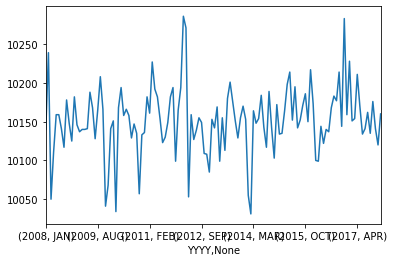

In [19]:
# Graphing chronological order after stacking
%matplotlib inline
df.stack().plot()

In [5]:
import pandas as pd
import numpy as np
# Lets get back to athletes dataset
athletes = pd.read_csv('../height_weight.csv')
athletes.dropna(inplace=True)
# Lets add a new column to the dataframe - sport which the athlete belongs to
import random
athletes['sport'] = np.nan
for i in range(0,athletes.count()[0]):
    athletes.loc[athletes.index[i],'sport'] = random.choice(['cricket','football','aquatics','badminton','basketball','soccer','table tennis'])


m = athletes.groupby(['sport','sex'])['weight'].mean()
m

sport         sex
aquatics      F      58.071429
              M      81.666667
badminton     F      58.250000
              M      70.000000
basketball    F      56.222222
              M      80.785714
cricket       F      57.000000
              M      74.428571
football      F      56.062500
              M      79.076923
soccer        F      57.578947
              M      64.375000
table tennis  F      69.888889
              M      77.615385
Name: weight, dtype: float64

In [6]:
# Unstack will conver the inner level of our index into columns
m.unstack()

sex,F,M
sport,,
aquatics,58.071429,81.666667
badminton,58.250000,70.000000
basketball,56.222222,80.785714
cricket,57.000000,74.428571
football,56.062500,79.076923
soccer,57.578947,64.375000
table tennis,69.888889,77.615385


In [7]:
p = pd.DataFrame({'id': [823905, 823905,
                         235897, 235897, 235897,
                         983422, 983422],
                  'item': ['prize', 'unit', 
                           'prize', 'unit', 'stock', 
                           'prize', 'stock'],
                  'value': [3.49, 'kg',
                            12.89, 'l', 50,
                            0.49, 4]})
p

,id,item,value
0,823905,prize,3.49
1,823905,unit,kg
2,235897,prize,12.89
3,235897,unit,l
4,235897,stock,50
5,983422,prize,0.49
6,983422,stock,4


In [8]:
# pivot() moves data from rows into columns
# so that we end up with a wider, shorter DataFrame

# The first argument is the column that will be used for row indices
# The second argument is the column that will be used to create column labels
p.pivot('id', 'item')

value           
item    prize stock unit
id                      
235897  12.89    50    l
823905   3.49   NaN   kg
983422   0.49     4  NaN

In [9]:
grades = pd.DataFrame([[6, 4, 5], [7, 8, 7], [6, 7, 9], [6, 5, 5], [5, 2, 7]], 
                       index = ['Mary', 'John', 'Ann', 'Pete', 'Laura'],
                       columns = ['test_1', 'test_2', 'test_3'])
grades.reset_index(inplace=True)
grades

,index,test_1,test_2,test_3
0,Mary,6,4,5
1,John,7,8,7
2,Ann,6,7,9
3,Pete,6,5,5
4,Laura,5,2,7


In [10]:
# melt() is the opposite of pivot()
# It moves the data from the rows into a single column
# The column names will show up in a new column called "variable"
grades.melt(id_vars=['index'])

,index,variable,value
0,Mary,test_1,6
1,John,test_1,7
2,Ann,test_1,6
3,Pete,test_1,6
4,Laura,test_1,5
5,Mary,test_2,4
6,John,test_2,8
7,Ann,test_2,7
8,Pete,test_2,5
9,Laura,test_2,2
